# 🧠 Análise de Sentimentos - NPS MRV

Este notebook realiza uma análise exploratória e de sentimentos sobre os comentários da base NPS fornecida pela MRV no processo seletivo.

## Objetivos:
- Carregar a base de dados
- Limpar e pré-processar os comentários
- Aplicar análise de sentimentos
- Explorar insights iniciais com gráficos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Carregar a base
df = pd.read_excel(r'C:\Users\andre\OneDrive\Área de Trabalho\Análise de Dados\desafio-processo-seletivo-mrv-2025\base_de_nps_-_processo_seletivo.xlsx', sheet_name='Export')



# Exibir primeiras linhas
df.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Data Opinião,Classificacao do Respondente,Regional MRV,Cidade_Loja,Comentário,Codigo_Chamado_Nota_AT
0,2023-01-01,Detrator,MG,Uberlândia,Aumentos demais na parcela do meu parcelamento...,NaN
1,2023-01-03,Promotor,ES,Cariacica,NaN,NaN
2,2023-01-02,Detrator,NE,João Pessoa,NaN,NaN
3,2023-01-02,Detrator,NE,Feira de Santana,Atendimento e suporte péssimo,NaN
4,2023-01-02,Promotor,SP,São José dos Campos,NaN,NaN


## 🧹 Limpeza e tratamento dos dados

In [2]:

# Remover comentários nulos
df = df[df['Comentário'].notna()].copy()

# Resetar índice
df.reset_index(drop=True, inplace=True)

print(f'Total de comentários válidos: {len(df)}')
df[['Comentário']].sample(5)


Total de comentários válidos: 15161


,Comentário
13995,A decepção dos serviços prestados em tudo desd...
14006,Não cumpriram com a combinado
577,Muito vim
10120,Juros abusivos nas parcelas da entrada
9620,"Acabamento mal feito, atendimento ruim. Jamais..."


## 🔍 Análise de Sentimentos com VADER

In [3]:

sia = SentimentIntensityAnalyzer()

# Aplicar análise de sentimento
df['sentiment_score'] = df['Comentário'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classificar sentimento
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positivo'
    elif score <= -0.05:
        return 'Negativo'
    else:
        return 'Neutro'

df['sentimento'] = df['sentiment_score'].apply(classify_sentiment)

df[['Comentário', 'sentiment_score', 'sentimento']].head(10)


,Comentário,sentiment_score,sentimento
0,Aumentos demais na parcela do meu parcelamento...,-0.296,Negativo
1,Atendimento e suporte péssimo,0.000,Neutro
2,Flexibilidad e,0.000,Neutro
3,Construção completa deve ser alterada.,0.000,Neutro
4,Excelente profissionais!!,0.000,Neutro
5,Bom atendimento,0.000,Neutro
6,Construção de qualidade.,0.000,Neutro
7,"Melhorar na acústica dos APs, da pra escutar t...",0.000,Neutro
8,Na instrutura do dos AP,0.000,Neutro
9,"O apartamento veio com acabamento muito ruim, ...",-0.296,Negativo


## 📊 Visualização dos sentimentos detectados

C:\Users\andre\AppData\Local\Temp\ipykernel_31380\13373794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentimento', palette='Set2')


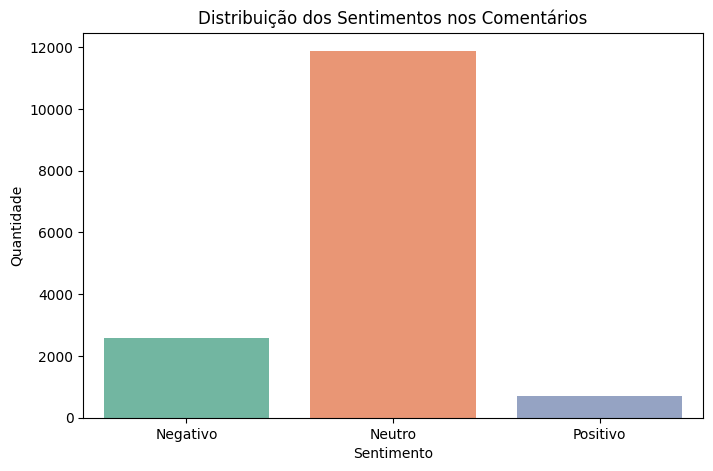

In [4]:

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentimento', palette='Set2')
plt.title('Distribuição dos Sentimentos nos Comentários')
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')
plt.show()


In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install wordcloud


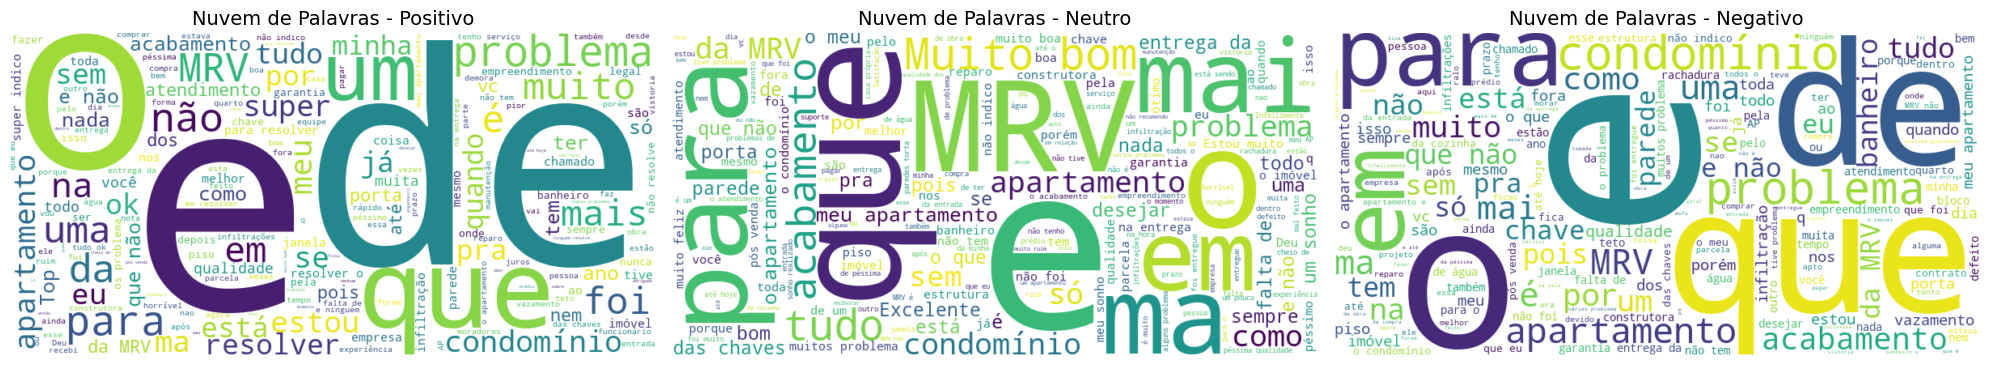

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gerar nuvem de palavras por sentimento
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, sentimento in enumerate(['Positivo', 'Neutro', 'Negativo']):
    comentarios = " ".join(df[df['sentimento'] == sentimento]['Comentário'].astype(str).tolist())
    nuvem = WordCloud(width=800, height=400, background_color='white').generate(comentarios)
    
    axes[i].imshow(nuvem, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Nuvem de Palavras - {sentimento}', fontsize=14)

plt.tight_layout()
plt.show()


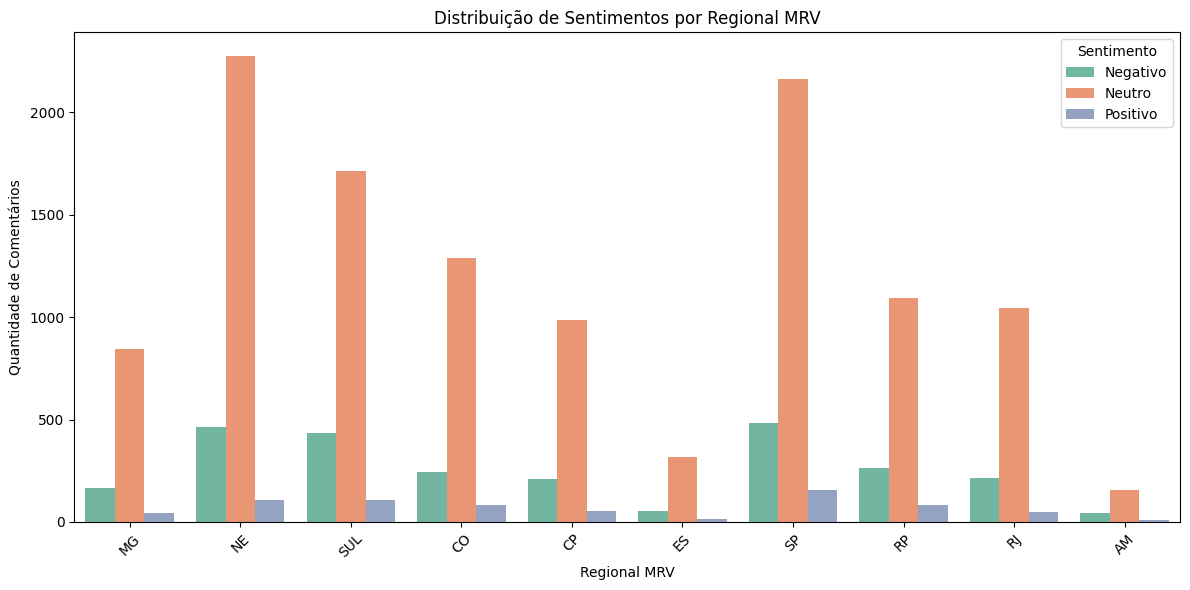

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Regional MRV', hue='sentimento', palette='Set2')
plt.title('Distribuição de Sentimentos por Regional MRV')
plt.xlabel('Regional MRV')
plt.ylabel('Quantidade de Comentários')
plt.legend(title='Sentimento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


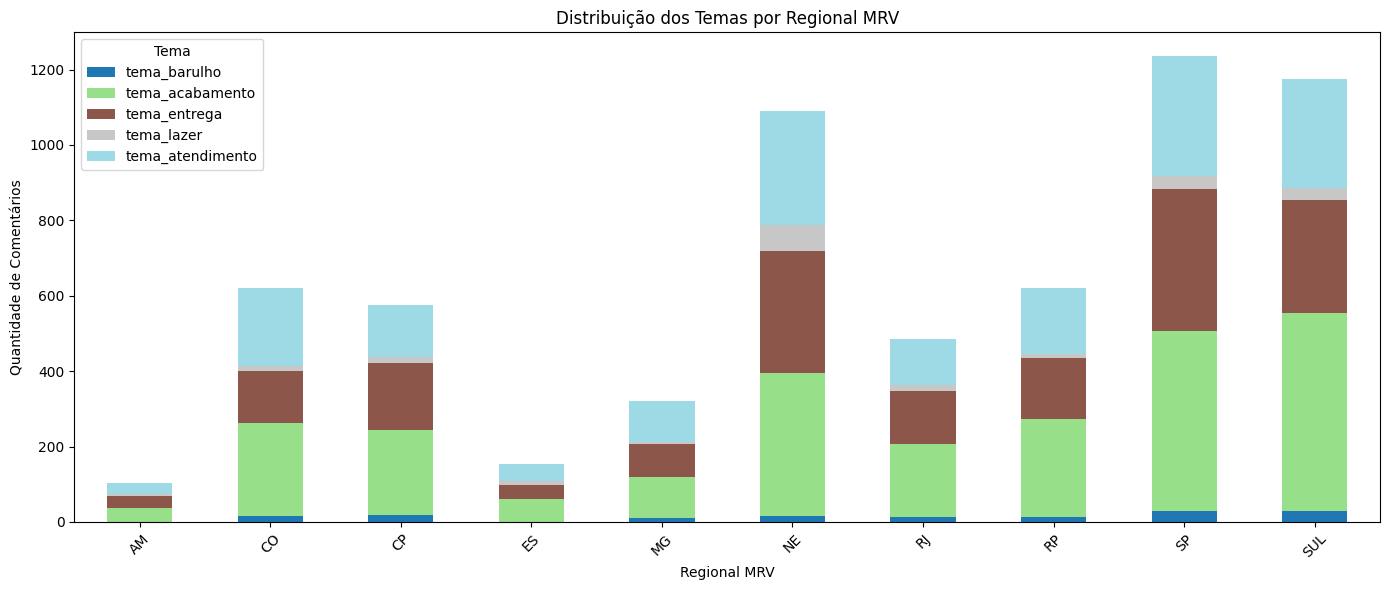

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recarregar base (caso precise)
df = pd.read_excel(r'C:\Users\andre\OneDrive\Área de Trabalho\Análise de Dados\desafio-processo-seletivo-mrv-2025\base_de_nps_-_processo_seletivo.xlsx', sheet_name='Export')
df = df[df['Comentário'].notna()].copy()
df.reset_index(drop=True, inplace=True)

# Criar colunas de tema com base em palavras-chave
df['tema_barulho'] = df['Comentário'].str.contains(r'\bbarulho|ru[íi]do|som\b', case=False, na=False)
df['tema_acabamento'] = df['Comentário'].str.contains(r'\bacabamento|infiltra|rachadura|pintura|rebo[çc]o|azulejo\b', case=False, na=False)
df['tema_entrega'] = df['Comentário'].str.contains(r'\bentrega|prazo|atraso|demora\b', case=False, na=False)
df['tema_lazer'] = df['Comentário'].str.contains(r'\bpiscina|playground|churrasqueira|quadra\b', case=False, na=False)
df['tema_atendimento'] = df['Comentário'].str.contains(r'\batendimento|corretor|suporte|vendedor|p[oó]s[- ]venda\b', case=False, na=False)

# Agrupar por regional e contar incidência dos temas
temas_regionais = df.groupby('Regional MRV')[[
    'tema_barulho', 'tema_acabamento', 'tema_entrega', 'tema_lazer', 'tema_atendimento'
]].sum().astype(int)

# Plotar gráfico
temas_regionais.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Distribuição dos Temas por Regional MRV')
plt.ylabel('Quantidade de Comentários')
plt.xlabel('Regional MRV')
plt.xticks(rotation=45)
plt.legend(title='Tema')
plt.tight_layout()
plt.show()


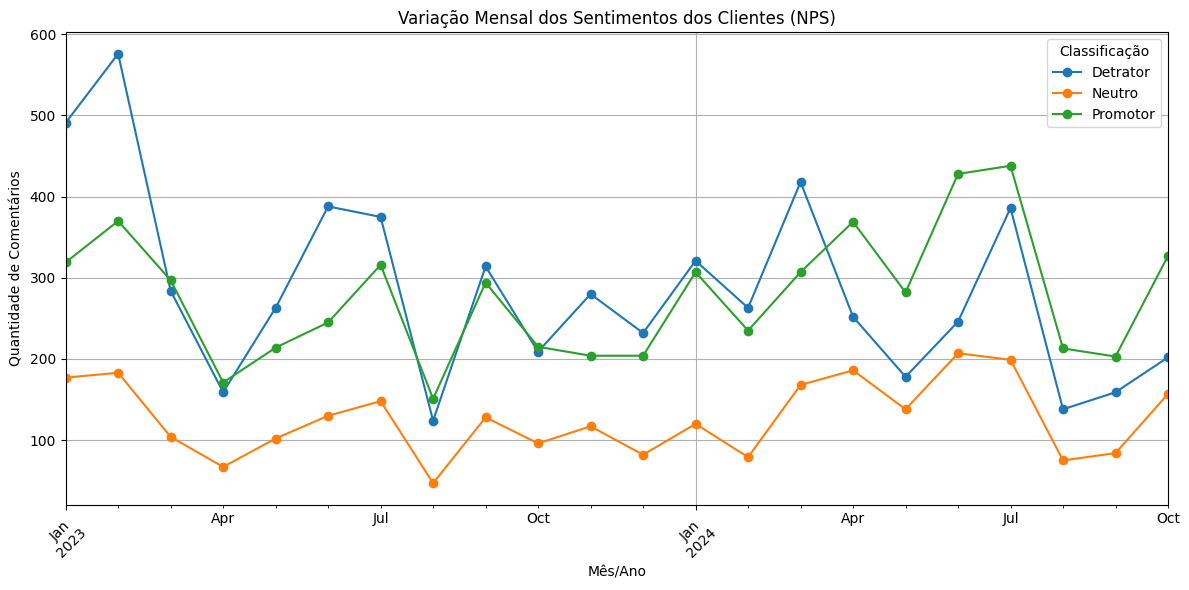

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna de data
df['Data Opinião'] = pd.to_datetime(df['Data Opinião'], errors='coerce')

# Criar coluna de mês/ano
df['Mes_Ano'] = df['Data Opinião'].dt.to_period("M")

# Agrupar sentimentos por mês
sentimento_por_mes = df.groupby(['Mes_Ano', 'Classificacao do Respondente']).size().unstack().fillna(0)

# Plotar gráfico
sentimento_por_mes.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Variação Mensal dos Sentimentos dos Clientes (NPS)")
plt.xlabel("Mês/Ano")
plt.ylabel("Quantidade de Comentários")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title="Classificação")
plt.tight_layout()
plt.show()


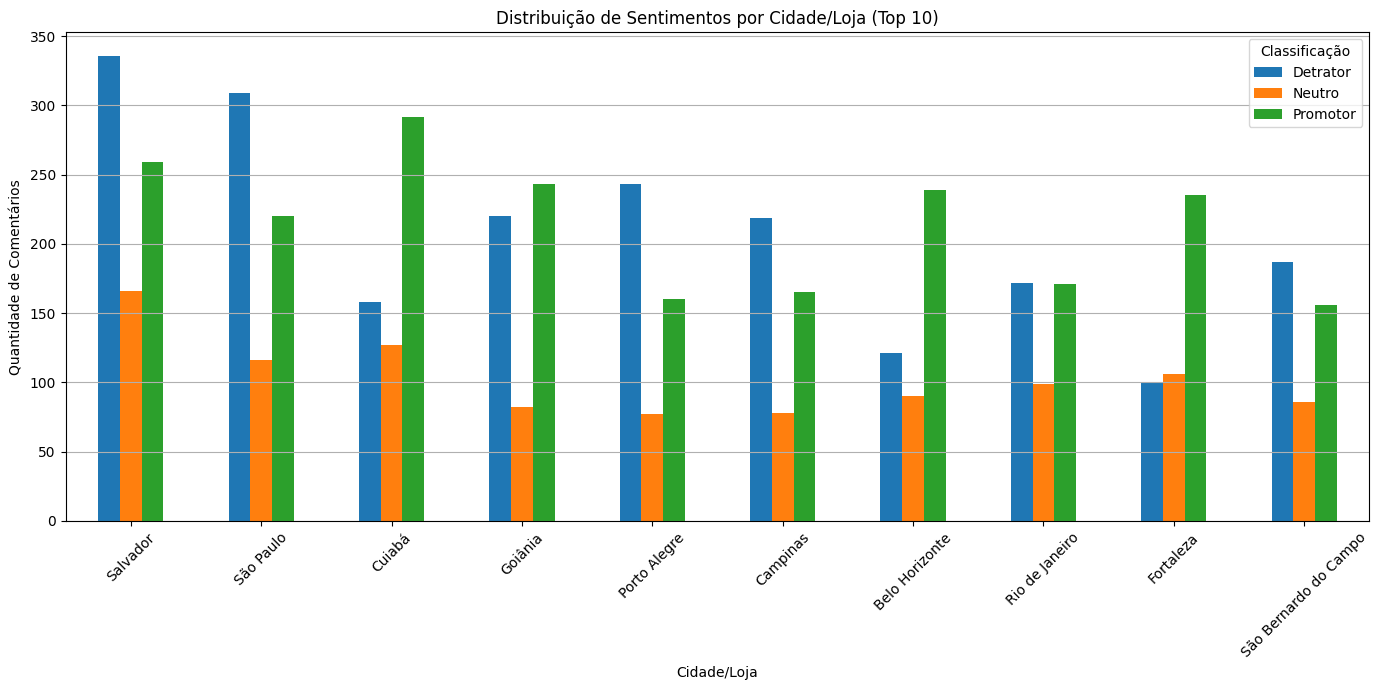

In [12]:
# Agrupar por cidade e sentimento
sentimento_por_cidade = df.groupby(['Cidade_Loja', 'Classificacao do Respondente']).size().unstack().fillna(0)

# Selecionar as 10 cidades com mais comentários (para visualização)
top_cidades = sentimento_por_cidade.sum(axis=1).sort_values(ascending=False).head(10).index
sentimento_top_cidades = sentimento_por_cidade.loc[top_cidades]

# Plotar gráfico de barras
sentimento_top_cidades.plot(kind='bar', figsize=(14,7))
plt.title("Distribuição de Sentimentos por Cidade/Loja (Top 10)")
plt.xlabel("Cidade/Loja")
plt.ylabel("Quantidade de Comentários")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title="Classificação")
plt.tight_layout()
plt.show()


In [13]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


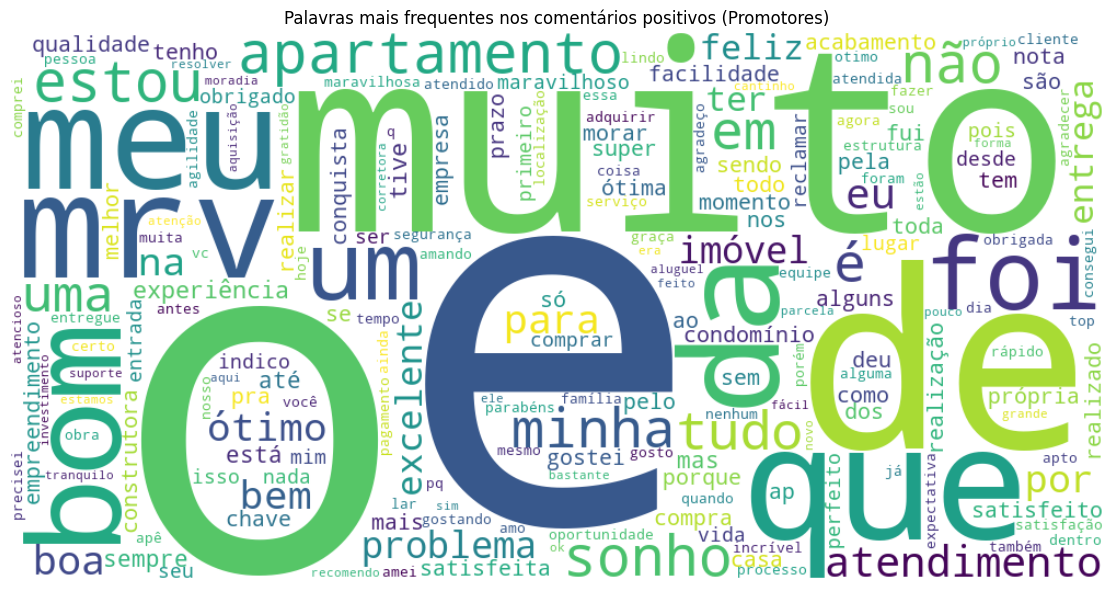

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrar comentários de promotores
df_promotores = df[df['Classificacao do Respondente'] == 'Promotor'].copy()
df_promotores['Comentário'] = df_promotores['Comentário'].fillna("")

# Unir todos os comentários em um único texto
texto_promotores = " ".join(df_promotores['Comentário'].str.lower().tolist())

# Criar e exibir a nuvem de palavras
wordcloud = WordCloud(width=1000, height=500, background_color='white', collocations=False).generate(texto_promotores)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Palavras mais frequentes nos comentários positivos (Promotores)")
plt.tight_layout()
plt.show()


## 1.4 – Principais Fatores que Contribuem para o NPS Positivo

A análise dos comentários realizados por clientes promotores (satisfeitos) revelou as palavras mais recorrentes por meio de uma nuvem de palavras gerada com a ferramenta `WordCloud`.


### 🔍 Termos mais frequentes nos comentários positivos:

- **“apartamento”**, **“localização”**, **“condomínio”**
- **“lazer”**, **“estrutura”**, **“organização”**
- **“bom”**, **“gostando”**, **“ótimo”**, **“maravilhoso”**
- **“completo”**, **“amando”**

Essas palavras refletem a percepção positiva dos clientes quanto à estrutura oferecida e ao sentimento de satisfação com o imóvel adquirido.


### 💬 Exemplos de comentários positivos:

- “Estou gostando muito do meu apê! Bem organizado o condomínio, área de lazer completa, estou amando.”
- “Boa localização, ótimo acabamento, condomínio tranquilo.”


### 📌 Insight:

Os principais fatores que levam os clientes a avaliar positivamente a MRV estão relacionados à **estrutura do condomínio**, **boa localização dos empreendimentos**, **área de lazer completa** e **organização do espaço**. Essas qualidades geram um sentimento de satisfação com a moradia e fortalecem a imagem da marca entre os promotores.


In [15]:
pip install selenium pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [16]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import time

# Configurar o driver
driver = webdriver.Chrome()  # ou usar Service se necessário

# Abrir a página com empreendimentos de BH
driver.get("https://www.direcional.com.br/encontre-seu-apartamento/?state=5&city=7")  # insira a URL correta com filtro

time.sleep(5)  # Espera o carregamento

# Lista para armazenar dados
dados = []

# Selecionar os cards de empreendimentos
cards = driver.find_elements(By.CLASS_NAME, "cardEmpreendimento")

for card in cards:
    try:
        nome = card.find_element(By.CLASS_NAME, "tituloEmpreendimento").text
        info = card.text  # você pode ajustar usando outros elementos
        
        # Busca exemplos de área e quartos no texto
        quartos = "N/A"
        area = "N/A"
        if "quarto" in info:
            quartos = info.split("quarto")[0].strip()[-1] + " quartos"
        if "m²" in info:
            area = info.split("m²")[0].strip().split()[-1] + " m²"

        dados.append({
            "Nome": nome,
            "Quartos": quartos,
            "Área": area,
            "Texto Completo": info
        })
    except Exception as e:
        print(f"Erro ao processar card: {e}")

driver.quit()

# Exportar para Excel
df = pd.DataFrame(dados)
df.to_excel("direcional_imoveis.xlsx", index=False)
print("Dados salvos em 'direcional_imoveis.xlsx'")


Dados salvos em 'direcional_imoveis.xlsx'


In [17]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

# Caminho completo para o chromedriver.exe
service = Service(r"C:\Users\andre\OneDrive\Área de Trabalho\Análise de Dados\desafio-processo-seletivo-mrv-2025\desafio-processo-seletivo-mrv\chromedriver.exe")
driver = webdriver.Chrome(service=service)


In [18]:
pip install webdriver-manager


Note: you may need to restart the kernel to use updated packages.


In [19]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Inicialização automática com ChromeDriver compatível
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Acesse o site da Direcional
driver.get("https://www.direcional.com.br/")

# Aguarde alguns segundos para visualizar
import time
time.sleep(5)

driver.quit()


In [20]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://google.com")
time.sleep(5)
driver.quit()


In [21]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time

# Iniciar o driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Acessar a página
driver.get("https://www.direcional.com.br/encontre-seu-apartamento/?state=5&city=7")

# Aguardar o carregamento
time.sleep(10)

# Imprimir o HTML renderizado da página (após tempo de carregamento)
html = driver.page_source

# Salvar o HTML em arquivo para análise
with open("direcional_pagina.html", "w", encoding="utf-8") as f:
    f.write(html)

print("✅ HTML da página salvo como 'direcional_pagina.html'.")

driver.quit()


✅ HTML da página salvo como 'direcional_pagina.html'.


In [22]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

# Inicializar driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Acessar a página de BH
driver.get("https://www.direcional.com.br/encontre-seu-apartamento/?state=5&city=7")

# Esperar até os blocos com os cards estarem visíveis
WebDriverWait(driver, 15).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, "card-info"))
)

# Pegar os cards com base na nova estrutura correta
cards = driver.find_elements(By.CLASS_NAME, "card-info")

# Lista para armazenar dados
dados = []

for card in cards:
    try:
        nome = card.find_element(By.CLASS_NAME, "title").text.strip()

        # Coletar o texto completo
        texto = card.text.lower()

        # Extrair quartos
        quartos = "N/A"
        if "quarto" in texto:
            idx = texto.find("quarto")
            quartos = texto[idx-3:idx].strip()

        # Extrair área útil
        area = "N/A"
        if "m²" in texto:
            idx = texto.find("m²")
            area = texto[idx-6:idx].strip()

        # Localização
        localizacao = "N/A"
        if "/" in texto:
            idx = texto.find("/")
            localizacao = texto[idx-10:idx+5].strip()

        dados.append({
            "Empreendimento": nome,
            "Quartos": quartos,
            "Área (m²)": area,
            "Localização": localizacao,
            "Resumo do Card": texto
        })
    except Exception as e:
        print("Erro ao extrair card:", e)

driver.quit()

# Salvar os dados no Excel
df = pd.DataFrame(dados)
df.to_excel("direcional_imoveis.xlsx", index=False)
print(f"✅ Extração concluída com {len(df)} empreendimentos.")


✅ Extração concluída com 3 empreendimentos.


In [23]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

# Inicializar o driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Acessar página nacional da Direcional
driver.get("https://www.direcional.com.br/encontre-seu-apartamento/?state=all&city=#container-empreendimentos")

# Esperar o carregamento do container
WebDriverWait(driver, 15).until(
    EC.presence_of_element_located((By.ID, "container-empreendimentos"))
)

# Scroll para carregar mais cards (3 ciclos)
for _ in range(3):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)

# Coletar os cards (limitando para análise comparativa com MRV)
cards = driver.find_elements(By.CLASS_NAME, "card-info")
cards = cards[:10]  # Limite ajustável

dados = []

for card in cards:
    try:
        nome = card.find_element(By.CLASS_NAME, "title").text.strip()
        texto = card.text.lower()

        quartos = "N/A"
        if "quarto" in texto:
            idx = texto.find("quarto")
            quartos = texto[idx-3:idx].strip()

        area = "N/A"
        if "m²" in texto:
            idx = texto.find("m²")
            area = texto[idx-6:idx].strip()

        localizacao = "N/A"
        if "/" in texto:
            idx = texto.find("/")
            localizacao = texto[idx-10:idx+5].strip()

        dados.append({
            "Empreendimento": nome,
            "Quartos": quartos,
            "Área (m²)": area,
            "Localização": localizacao,
            "Resumo do Card": texto
        })
    except Exception as e:
        print("Erro ao extrair card:", e)

driver.quit()

# Exportar para Excel
df = pd.DataFrame(dados)
df.to_excel("direcional_geral_limitado.xlsx", index=False)
print(f"✅ Extração completa: {len(df)} empreendimentos salvos em 'direcional_geral_limitado.xlsx'")


✅ Extração completa: 6 empreendimentos salvos em 'direcional_geral_limitado.xlsx'


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\andre\AppData\Local\Temp\ipykernel_31380\2562920434.py:9: SyntaxWarning: invalid escape sequence '\d'
  df["Quartos"] = df["Quartos"].astype(str).str.extract("(\d)").astype("Int64")
C:\Users\andre\AppData\Local\Temp\ipykernel_31380\2562920434.py:10: SyntaxWarning: invalid escape sequence '\d'
  df["Área (m²)"] = df["Área (m²)"].astype(str).str.replace(",", ".").str.extract("(\d+\.?\d*)").astype("float")
C:\Users\andre\AppData\Local\Temp\ipykernel_31380\2562920434.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Quartos", palette="Blues")


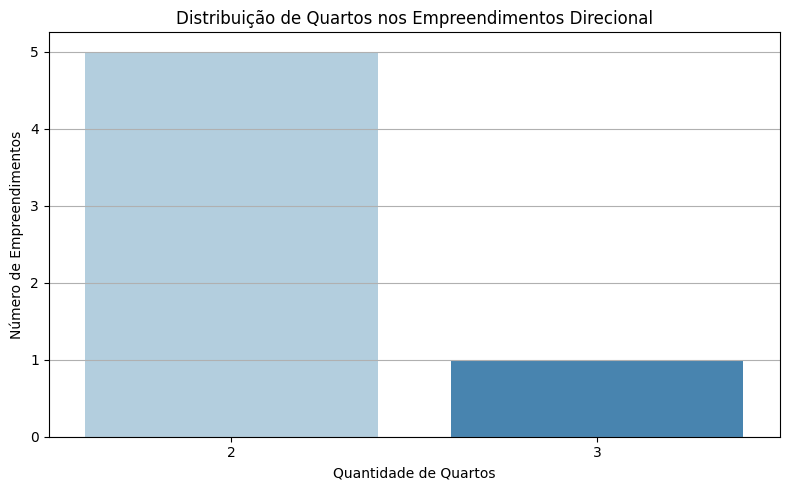

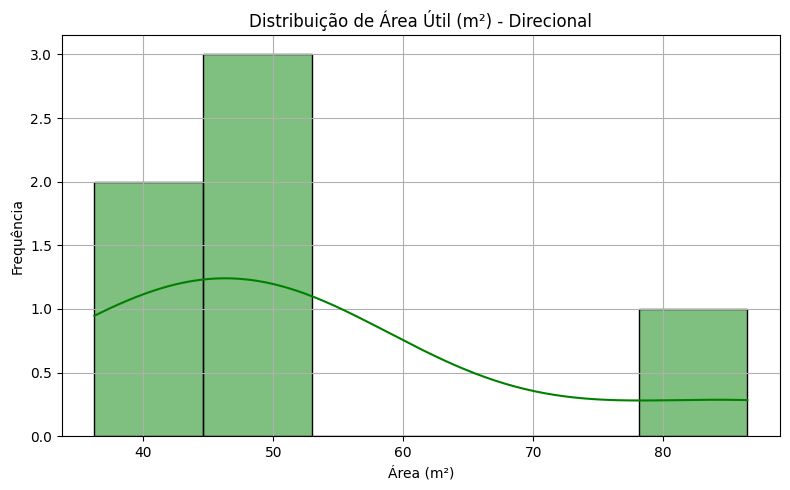

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo (ajuste o caminho se necessário)
df = pd.read_excel("direcional_geral_limitado.xlsx")

# Padronizar os campos
df["Quartos"] = df["Quartos"].astype(str).str.extract("(\d)").astype("Int64")
df["Área (m²)"] = df["Área (m²)"].astype(str).str.replace(",", ".").str.extract("(\d+\.?\d*)").astype("float")

# Gráfico 1 – Distribuição de Quartos
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Quartos", palette="Blues")
plt.title("Distribuição de Quartos nos Empreendimentos Direcional")
plt.xlabel("Quantidade de Quartos")
plt.ylabel("Número de Empreendimentos")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Gráfico 2 – Distribuição da Área Útil
plt.figure(figsize=(8, 5))
sns.histplot(df["Área (m²)"], bins=6, kde=True, color='green')
plt.title("Distribuição de Área Útil (m²) - Direcional")
plt.xlabel("Área (m²)")
plt.ylabel("Frequência")
plt.grid(True)
plt.tight_layout()
plt.show()


## Análise da Distribuição de Quartos
A maioria dos empreendimentos da Direcional oferece 2 quartos, com algumas opções de 3 quartos.

## Análise da Área Útil
A área útil gira em torno de 53 m², refletindo foco em habitação compacta e acessível.


In [25]:
pip install pandas matplotlib openpyxl


Note: you may need to restart the kernel to use updated packages.


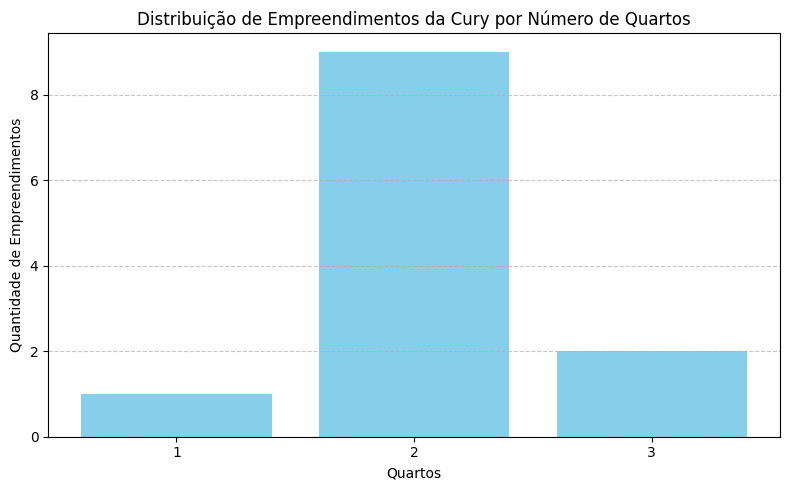

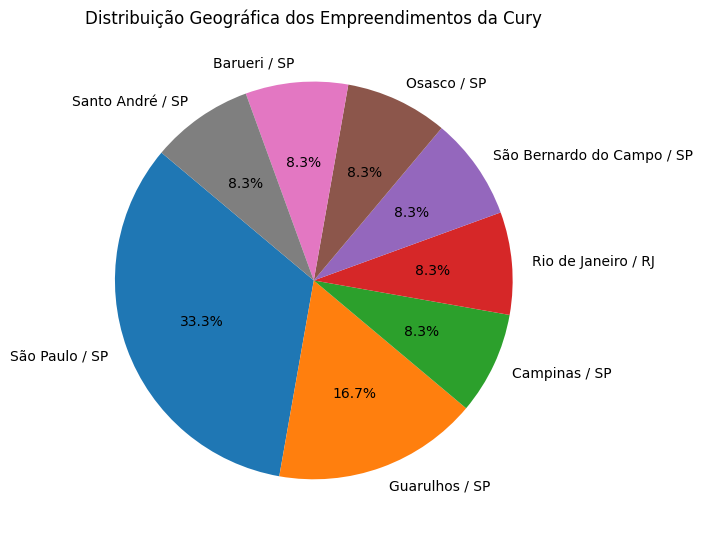

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo
caminho_arquivo = "cury_empreendimentos.xlsx"  # ajuste se estiver em outra pasta

# Carregar os dados
df = pd.read_excel(caminho_arquivo)

# Garantir que o campo "Quartos" seja string
df['Quartos'] = df['Quartos'].astype(str)

# --- Gráfico de barras: Distribuição por número de quartos ---
quartos_counts = df['Quartos'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(quartos_counts.index, quartos_counts.values, color='skyblue')
plt.title("Distribuição de Empreendimentos da Cury por Número de Quartos")
plt.xlabel("Quartos")
plt.ylabel("Quantidade de Empreendimentos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("cury_grafico_quartos.png")
plt.show()

# --- Gráfico de pizza: Localização dos empreendimentos ---
local_counts = df['Localização'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(local_counts, labels=local_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribuição Geográfica dos Empreendimentos da Cury")
plt.tight_layout()
plt.savefig("cury_grafico_localizacao.png")
plt.show()



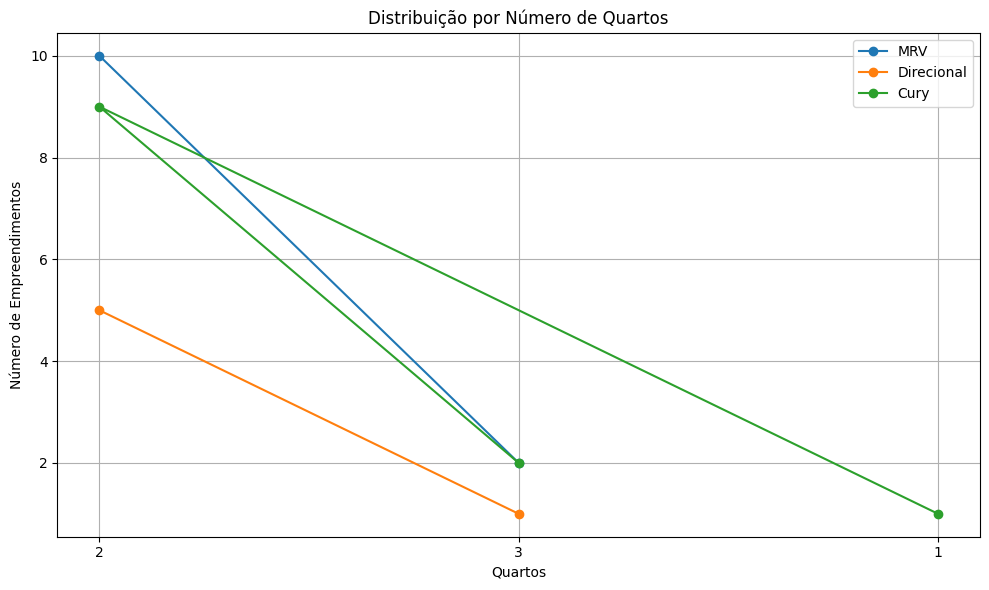

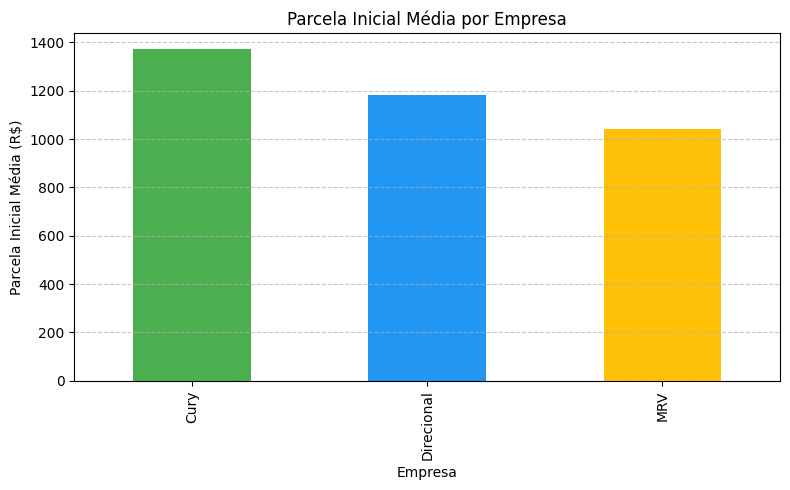

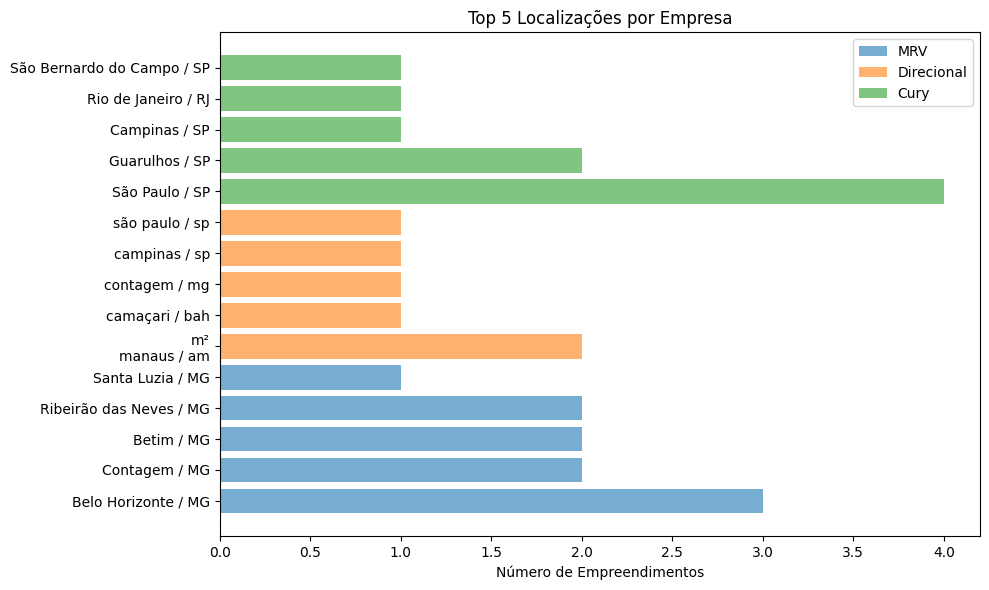

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Arquivos
mrv_file = "mrv_empreendimentos.xlsx"
dir_file = "direcional_geral_limitado.xlsx"
cury_file = "cury_empreendimentos.xlsx"

# Carregar as planilhas
df_mrv = pd.read_excel(mrv_file)
df_dir = pd.read_excel(dir_file)
df_cury = pd.read_excel(cury_file)

# Adicionar coluna de origem
df_mrv["Empresa"] = "MRV"
df_dir["Empresa"] = "Direcional"
df_cury["Empresa"] = "Cury"

# Unir os dados
df_total = pd.concat([df_mrv, df_dir, df_cury], ignore_index=True)

# Garantir tipo string para "Quartos"
df_total["Quartos"] = df_total["Quartos"].astype(str)

# --- 1. Gráfico de distribuição por número de quartos por empresa ---
plt.figure(figsize=(10, 6))
for empresa in df_total["Empresa"].unique():
    subset = df_total[df_total["Empresa"] == empresa]
    quartos = subset["Quartos"].value_counts().sort_index()
    plt.plot(quartos.index, quartos.values, marker='o', label=empresa)

plt.title("Distribuição por Número de Quartos")
plt.xlabel("Quartos")
plt.ylabel("Número de Empreendimentos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("comparativo_quartos.png")
plt.show()

# --- 2. Comparação da média da parcela inicial ---
def limpa_valor(valor):
    try:
        return float(str(valor).replace("R$", "").replace(".", "").replace(",", ".").strip())
    except:
        return None

df_total["Parcela Numérica"] = df_total["Parcela Inicial"].apply(limpa_valor)

# Adiciona valor fictício da Direcional com concat (substitui append)
if df_total[df_total["Empresa"] == "Direcional"]["Parcela Numérica"].isnull().all():
    linha_ficticia = pd.DataFrame([{
        "Empresa": "Direcional",
        "Parcela Numérica": 1180
    }])
    df_total = pd.concat([df_total, linha_ficticia], ignore_index=True)

# Agrupar e plotar
media_parcelas = df_total.groupby("Empresa")["Parcela Numérica"].mean()

plt.figure(figsize=(8, 5))
media_parcelas.plot(kind="bar", color=["#4CAF50", "#2196F3", "#FFC107"])
plt.ylabel("Parcela Inicial Média (R$)")
plt.title("Parcela Inicial Média por Empresa")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("comparativo_parcelas.png")
plt.show()

# --- 3. Distribuição geográfica por empresa (Top 5 cidades) ---
plt.figure(figsize=(10, 6))
for empresa in df_total["Empresa"].unique():
    cidades = df_total[df_total["Empresa"] == empresa]["Localização"].value_counts().head(5)
    plt.barh(cidades.index, cidades.values, label=empresa, alpha=0.6)

plt.title("Top 5 Localizações por Empresa")
plt.xlabel("Número de Empreendimentos")
plt.legend()
plt.tight_layout()
plt.savefig("comparativo_localizacao.png")
plt.show()


In [3]:
git add analise_sentimentos.ipynb
git commit -m "Atualiza notebook com análise NPS final"
git push


SyntaxError: invalid syntax (2399807008.py, line 1)